In [97]:
import pandas as pd
from sqlalchemy import create_engine
import json
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
import plotly.express as px
import numpy as np

In [98]:
# Read the MySQL configuration from the JSON file
with open('config.json', 'r') as config_file:
    config = json.load(config_file)

In [99]:
# Extract MySQL connection details
mysql_config = config.get('mysql', {})
username = mysql_config.get('username', 'default_username')
password = mysql_config.get('password', 'default_password')
host = mysql_config.get('host', 'localhost')
database_name = mysql_config.get('database_name', 'your_database')
table_name = 'measurments_rewa'

In [100]:
# Create the MySQL database connection string
db_url = f"mysql+mysqlconnector://{username}:{password}@{host}/{database_name}"

# Create an SQLAlchemy engine
engine = create_engine(db_url)

# Use the engine to connect to the database
connection = engine.connect()

In [101]:
# Specify the SQL query to retrieve data from a table
query = "SELECT * FROM joined_wind_data"

# Use Pandas to read data from the database into a DataFrame
df = pd.read_sql(query, connection)

# Close the database connection
connection.close()

In [112]:
# Calculate delta
df['delta'] = df['WindMeasured'] - df['WindForecast']
df

,LeftTableTime,RightTableTime,WindForecast,GustForecast,TempForecast,PrecipitationForecast,CloudForecast,WindDirForecast,WindDirBinForecast,WindMeasured,GustMeasured,TempMeasured,WindDirMeasured,BaroMeasured,Month,delta,WindMeasuredBin,WindDirMeasuredBin
0,2021-01-26 00:00:00,2021-01-26 02:00:00,12.0,16.0,2.0,0.0,100.0,287.0,W,5.1,5.8,1.2,236.0,1027.5,1,-6.9,4-6,SW
1,2021-01-26 00:10:00,2021-01-26 02:00:00,12.0,16.0,2.0,0.0,100.0,287.0,W,5.5,6.5,1.2,234.0,1027.6,1,-6.5,4-6,SW
2,2021-01-26 00:20:00,2021-01-26 02:00:00,12.0,16.0,2.0,0.0,100.0,287.0,W,5.1,5.8,1.3,261.0,1027.5,1,-6.9,4-6,SW
3,2021-01-26 00:30:00,2021-01-26 02:00:00,12.0,16.0,2.0,0.0,100.0,287.0,W,5.2,6.1,1.1,242.0,1027.4,1,-6.8,4-6,SW
4,2021-01-26 00:40:00,2021-01-26 02:00:00,12.0,16.0,2.0,0.0,100.0,287.0,W,5.6,6.1,1.1,244.0,1027.5,1,-6.4,4-6,SW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114103,2023-05-07 23:10:00,2023-05-08 00:00:00,7.0,15.0,7.0,0.0,5.0,81.0,NE,1.0,1.7,-6.2,132.0,1014.7,5,-6.0,0-2,E
114104,2023-05-07 23:20:00,2023-05-08 00:00:00,7.0,15.0,7.0,0.0,5.0,81.0,NE,1.7,2.4,-6.1,119.0,1014.9,5,-5.3,0-2,E
114105,2023-05-07 23:30:00,2023-05-08 00:00:00,7.0,15.0,7.0,0.0,5.0,81.0,NE,1.0,2.4,-6.1,116.0,1014.9,5,-6.0,0-2,E
114106,2023-05-07 23:40:00,2023-05-08 00:00:00,7.0,15.0,7.0,0.0,5.0,81.0,NE,2.0,2.7,-6.0,129.0,1015.0,5,-5.0,0-2,E


In [103]:
# Assuming 'df' is your DataFrame with wind data
# You can define your bins and labels for wind speed
bins = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26]  # Customize bin edges as needed
labels = ['0-2', '2-4', '4-6', '6-8', '8-10', '10-12', '12-14', '14-16', '16-18', '18-20', '20-22', '22-24','24-26']

# Create a new column 'WindSpeedBin' with the binned wind speeds
df['WindMeasuredBin'] = pd.cut(df['WindMeasured'], bins=bins, labels=labels)

# Define wind direction bins
bins = [0, 45, 90, 135, 180, 225, 270, 315, 360]
labels = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']

# Bin wind directions and calculate mean wind speed for each bin
df['WindDirMeasuredBin'] = pd.cut(df['WindDirMeasured'], bins=bins, labels=labels)
#aggregated_data = df.groupby('WindDirBin')['WindSpeed'].count().reset_index()
aggregated_data = df.groupby(['WindDirMeasuredBin', 'WindMeasuredBin']).agg({'WindMeasured':'mean', 'delta':'mean','WindDirMeasured':'count'}).reset_index()

In [108]:
aggregated_data['FrequencyMeasured'] = np.round(aggregated_data['WindDirMeasured']/aggregated_data['WindDirMeasured'].sum(),3)*100

In [109]:
aggregated_data

,WindDirMeasuredBin,WindMeasuredBin,WindMeasured,delta,WindDirMeasured,FrequencyMeasured
0,N,0-2,1.432031,-4.238585,768,0.7
1,N,2-4,3.116319,-3.685814,1581,1.4
2,N,4-6,4.998579,-2.930113,2041,1.8
3,N,6-8,6.940764,-3.253045,1413,1.2
4,N,8-10,8.944770,-4.050342,1023,0.9
...,...,...,...,...,...,...
99,NW,16-18,16.990625,-4.616518,224,0.2
100,NW,18-20,18.975325,-5.751948,77,0.1
101,NW,20-22,20.954762,-4.854762,42,0.0
102,NW,22-24,22.783333,-3.438889,18,0.0


In [107]:
# Create a wind rose plot
fig = px.bar_polar(aggregated_data, r='FrequencyMeasured', theta='WindDirMeasuredBin', color='delta',
                   template='plotly_dark', color_discrete_sequence=px.colors.sequential.Plasma_r)
# Set the figure size
fig.update_layout(width=1600, height=800)
fig.show()

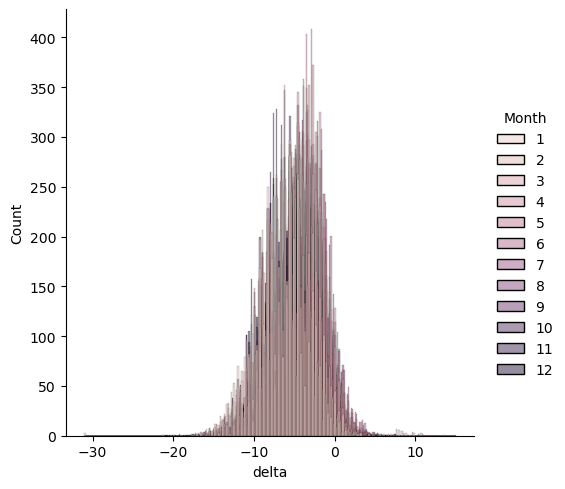

In [118]:
df['Month'].astype('category')
sns.displot(data=df, x='delta', hue='Month', kind='hist')